In [174]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [200]:
def lorentz(x, y0, amp, cen, wid):
    return y0 + (amp)*(wid/((x-cen)**2 + wid**2))

-4.26687 0.00964522
-4.11471 0.015286
-4.0828 0.0324046
-3.91848 0.00305599
-3.72974 0.0631054
-3.59353 0.0879074
-3.46106 0.0663937
-3.01444 0.0215028
-2.8514 0.0190664
-2.74705 0.0115178
-2.68933 0.000632368
-2.38221 0.258517
-2.27565 0.293257
-2.11383 0.804292
-1.96786 0.0223953
-1.8431 0.0602452
-1.60425 0.119794
-1.47109 0.0372265
-1.32261 0.110907
-1.20957 0.0172207
-1.11156 0.0125412
-1.03685 0.0304707
-0.992023 0.00273231
-0.82343 0.0537173
-0.755961 0.138896
-0.600826 0.00767441
-0.542758 0.0128098
-0.403034 0.122548
-0.348441 0.0445962
-0.153124 0.0728126
-0.0424882 0.00362879
0.0892968 0.0413118
0.145242 0.00904293
0.259305 0.00421175
0.367306 0.0010751
0.477568 0.000646674
0.595178 0.00149025
0.681853 0.00095437
0.791158 0.00500905
0.877647 0.00196193
0.974887 0.00106296
1.09961 0.00549963
1.17329 0.00172876
1.29394 0.00559861
1.3704 0.000117533
1.49493 0.00476816
1.57528 0.00707565
1.69328 0.00543439
1.79188 0.00548299
1.89679 0.00278117
1.98704 0.00381006
2.08908 0.016471

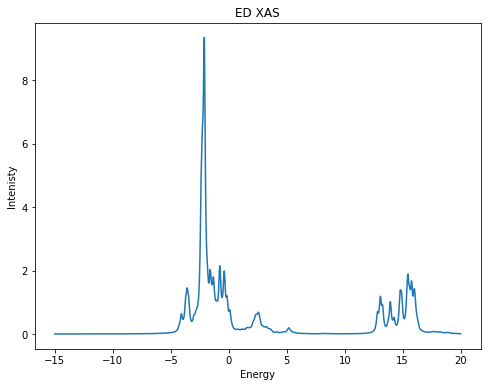

In [398]:
nedos = 1000
xdata = np.linspace(-15,20,nedos)
ydata = np.zeros(nedos)
with open('xas_peaks.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        print(p,i)
        ydata += lorentz(xdata,0,i,p,0.1)

plt.figure(figsize=(8,6))
plt.plot(xdata,ydata)
plt.title("ED XAS")
plt.ylabel("Intenisty")
plt.xlabel("Energy")
# plt.xlim([-2,2])
plt.show()